### ANN for regression, example 1, house energy bill estimation

#### Imports / modules

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [2]:
# load the csv-file to pandas DataFrame
df = pd.read_csv("Household energy bill data.csv")

In [3]:
# quickly check the first few rows of data
# to see what we have here
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


#### X/y-split

In [4]:
# perform X/y -split
# if you  have more than one independent variable, list them all here
# leave out the target variable! (dependent variable)

# this is a nice and common trick => everything EXCEPT target variable => support variable
X = df.drop("amount_paid", axis=1)

# have only the target variable here (dependent variable)
y = df["amount_paid"]

#### Train/test/validation -split

In [5]:
# in Classic ML, we only had train/test -split
# in deep learning, we usually use validation-data also, for better
# optimization possibilities and better metrics

# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.

# if you want to split the test set into two for a validation set too, try this trick:

# step 1, split the data into 70% (training data) and 30% (temporary data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# step 2, split the temporary data in HALF (0.5) => 15% test and 15% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

#### Create a neural network structure

In [6]:
# create neural network

# save the amount of support variables into a helper variable
# so we don't have to update the input_shape all the time
variable_amount = len(X.columns)

# Define Sequential neural network model
# input shape has to match the amount of SUPPORT VARIABLES
# in other words => amount of columns in X 
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(variable_amount,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\tuomas.valtanen\DL2025lecturenotes2\DeepLearning2025\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081 (4.22 KB)

 Trainable params: 1,081 (4.22 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the neural network

In [7]:
# train/fit neural network with validation data
# see the instructions on the train/test -split above on how to split the data correctly
model.fit(x=X_train, y=y_train, epochs=1200, validation_data=(X_val, y_val))

Epoch 1/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 208936.9375 - val_loss: 191266.3125
Epoch 2/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 142812.1562 - val_loss: 105771.5078
Epoch 3/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99446.2656 - val_loss: 102884.0703
Epoch 4/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96017.6250 - val_loss: 93479.7344
Epoch 5/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85816.5156 - val_loss: 87547.6562
Epoch 6/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81929.0312 - val_loss: 89159.5469
Epoch 7/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79754.6953 - val_loss: 80265.8906
Epoch 8/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73582.8906 - val_loss: 78948.0625
Epoch 9/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71473.3047 - val_loss: 89175.2578
Epoch 10/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70343.0234 - val_loss: 76606.4375
Epoch 11/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

#### Performance and error metrics in order to see if the model trained and works well

<Axes: >

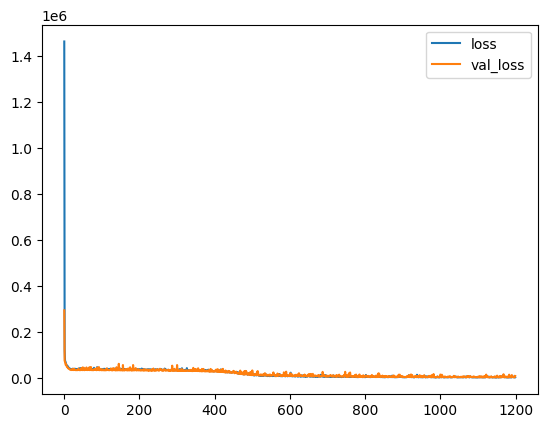

In [ ]:
# let's use pandas for this (easy code)
# try to look if the model is actually training 
# => the error is going downwards
# if using validation data, you get two lines
# in this case, see if the lines follow a similar trend 
# (they don't always overlap with complex data, the trend is more important)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
13045.46875

Train data evaluation:
10560.3271484375


In [ ]:
# get test predictions
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Test True Y,Model Predictions
0,606.183976,745.496033
1,456.256871,523.733459
2,935.008453,892.172424
3,696.631186,745.068542
4,529.752567,658.907776
...,...,...
145,481.925530,481.655670
146,244.017269,365.648438
147,370.073226,505.786407
148,266.549357,388.629272


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

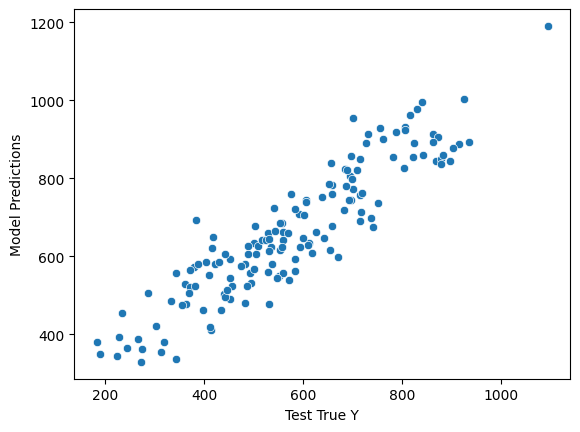

In [ ]:
# these values follow a linear diagonal line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [ ]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
95.75 $

MSE
13045.47 $^2

RMSE:
114.22 $

R-squared:
0.61

Explained variance score:
0.84


C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_13796\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


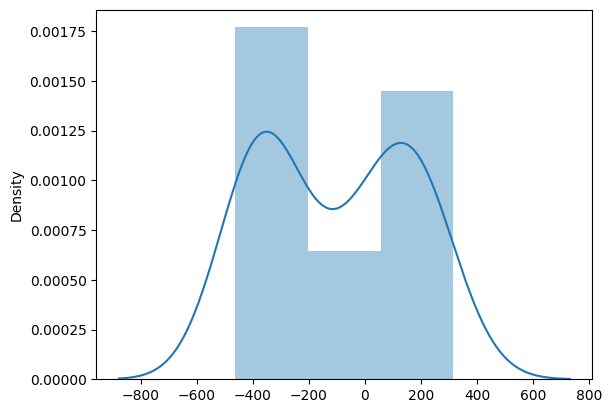

In [ ]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [ ]:
df.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

#### Trying the model in practice with new imaginary house

In [ ]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
    'num_rooms': 7, 
    'num_people': 2, 
    'housearea': 350, 
    'is_ac': 0, 
    'is_tv': 0, 
    'is_flat': 0,
    'ave_monthly_income': 1500, 
    'num_children': 0, 
    'is_urban': 0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [ ]:
# get the prediction from the model and print out the result
result = model.predict(tester_row)[0]

print()
print(f"Estimated energy bill for this house:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Estimated energy bill for this house::
$ 155.71
----------------
